1. Decision boundries divides the entire coordinate system in the number of classes.
2. We will be drawing decision boundries for KNN.
3. For higher dimensions, we use hyperplanes as decision boundries.

Vornoi Diagram
In mathematics, a Voronoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset
of the plane.


# Plotting the decision boundries for KNN

1. Training the classifier on the training set
2. Create a uniform grid( with the help of numpy Meshgrids) of points that densely cover the region containing the training set.
3. Classify each point on the grid. Store the results in an array A, where Aij contain the predicted class for the point row i,    column j on the grid. 
4. Plot the array as an image, where each pixel corresponds to a grid point and its color represents to a grid points and its      color represents the predicted class. The decision boundries can be seen as countours where the image changes color.
5. Finally printing the training data with their respective color of the same contour.

In [16]:
# sample grid:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.array([1,2,3])
y =np.array([4,5,6,7])

XX,YY = np.meshgrid(x,y)
print(XX)
print(YY)
print(XX.shape, YY.shape)


[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]
(4, 3) (4, 3)


In [11]:
# plotting a meshgrid using meshgrid
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)
XX,YY = np.meshgrid(x,y)

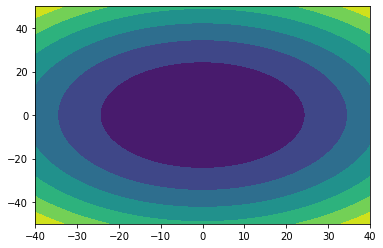

In [12]:
Z = (XX**2 + YY**2)
plt.contourf(XX,YY,Z)

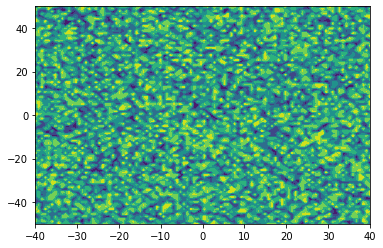

In [13]:
Z = np.random.random((90,100))
plt.contourf(XX,YY,Z)

In [17]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(320, 2)

In [23]:
X_test.shape

(80, 2)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test)

/home/ravi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
y_pred.shape

(80,)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9125


In [31]:
# Creating a meshgrid
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
a.shape

(598,)

In [32]:
b = np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)
b.shape

(595,)

In [33]:
XX,YY = np.meshgrid(a,b)
XX.shape

(595, 598)

In [34]:
YY.shape

(595, 598)

In [43]:
# classifing every point on the meshgrid
print(YY[0][0])
print(XX[0][0])
knn.predict(np.array([-2.8962428607441635,-2.610881219725103]).reshape(1,2))

-2.610881219725103
-2.8962428607441635


/home/ravi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [53]:
input_array = np.array([XX.ravel(),YY.ravel()]).T  # ravel()  converts into 1-D array
labels = knn.predict(input_array)

/home/ravi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
labels.reshape(XX.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

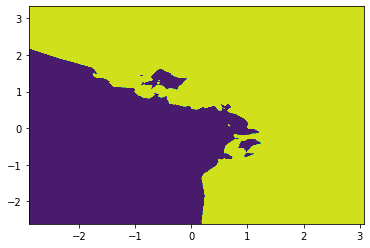

In [57]:
# plotting the array as an image
plt.contourf(XX,YY,labels.reshape(XX.shape))

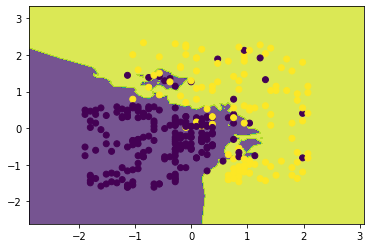

In [62]:
# plotting all the training data on the plot
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

In [63]:
# Hence, done